<a href="https://colab.research.google.com/github/Nuelky/Finance/blob/main/MScFE_622_Stochastic_Modeling_GWP3_GroupNo_7907.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|  |  |
|:---|:---|
|**Group member** |  Bui Tien Thanh |
| |  Vaibhav Janve |
| |  Emmanuel Kossy Okonkwo |

**STEP 1.** Read
pay close attention to Algorithm1

**STEP 2.** <br>
**description:** <br>
Huo et al.[] frame the portfolio selection task as a multi-armed bandit (MAB) problem. In this context, the term "arm" represents different and independent investment options available (e.g. stocks, bonds etc.) with the goal to maximize cummulative returns over time while managing risk navigating the tradeoff between eploration and exploitation.
<br>
**Key conepts/terms in Portfolio Selection as a Multi-Armed Bandit Problem:** <br>


*   Arms: Independent investment options available. Their returns are uncertain and time varying.
*   Rewards: return generated by investign in an asset (pulling an arm).
*   Exploration - Exploitation: The MAB framework challenge is to balance exploration and exploitation. Where, exploration implies trying different assets to learn about their returns, and exploitation indicates investing in the asset that has provided the best returns based on past information.
*   Risk awareness: A risk-aware decision making is incorporated in model by including the variance along with the expected returns.

**Pseudocode for Model 1: described in Huo et al. [TODO: review]**
```
Initialize:
    Set number_of_arms = N  # Total number of assets
    Set initial_weights = [1/N] * N  # Equal initial weights for each asset
    Set total_rounds = T  # Total number of investment rounds
    Set rewards = [0] * N  # Initialize rewards for each arm
    Set counts = [0] * N  # Initialize counts for each arm

For t = 1 to total_rounds:
    For each arm i in 1 to N:
        # Calculate the estimated return for each arm
        estimated_return[i] = rewards[i] / counts[i] if counts[i] > 0 else 0

    # Select the arm with the highest estimated return (exploitation)
    selected_arm = argmax(estimated_return)

    # Explore: Optionally select a random arm with a probability epsilon
    if random() < epsilon:
        selected_arm = random_choice_from_arms()

    # Pull the selected arm (invest in the asset)
    current_return = pull_arm(selected_arm)  # Get the return from the selected asset

    # Update the rewards and counts
    rewards[selected_arm] += current_return
    counts[selected_arm] += 1

    # Update the portfolio weights based on the selected arm
    update_portfolio_weights(initial_weights, selected_arm)

Return final portfolio weights and cumulative return

```






**Reference** <br>
Huo, X. and Fu, F. (2017). Risk-aware multi-armed bandit problem with application to portfolio selection. Royal Society Open Science, 4(11), 171377. https://doi.org/10.1098/rsos.171377

**STEP 3. Individually, students will collect the sample data used in the paper. The data comes from daily returns during Sep 2008 and Oct 2008.**

In [ ]:
# SETUP: install packages, load libraries and define functions
!pip install yfinance

a. Member A collects the data for 15 financial institutions (JPM,WFC, BAC, C, G
USB, MS, KEY, PNC, COF, AXP, PRU, SCHW, BBT, STI)

b. Member B collects the data for 15 non-financial institutions (KR, PFE, XOM, WM,DAL, CSCO, HCP, EQIX, DUK, NFLX, GE, APA, F, REGN, CMS).

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import datetime

In [ ]:
tickers_a = [
    "JPM", "WFC", "BAC", "C","GS", "USB", "MS", "KEY",
    "PNC", "COF", "AXP", "PRU", "SCHW", "TFC"]

In [ ]:
start_date = "2008-09-01"
end_date = "2008-11-01"

In [ ]:
data = {}
data_1 = {}
for ticker in tickers_a:
  stock = yf.download(ticker, start=start_date, end=end_date, progress=False)
  stock["Daily Return"] = stock["Close"].pct_change()  # Calculate daily returns
  data[ticker] = stock[["Daily Return"]]
  data_1[ticker] = stock[["Close"]]


b. Member B collects the data for 15 non-financial institutions (KR, PFE, XOM, WM
DAL, CSCO, HCP, EQIX, DUK, NFLX, GE, APA, F, REGN, CMS).<br>
Dates: Sep 2008 and Oct 2008

In [ ]:
# install and load needed libraries
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import pandas_datareader.data as web
import datetime

import warnings

warnings.filterwarnings("ignore")

In [ ]:
start_date = "2008-09-01"
end_date = "2008-11-01"
# member A defined the data frame
#data = {}
#data_1 = {}

**bold text "The HashiCorp (HCP) software company went public in 2021, so data is not located and removed."**

In [ ]:
tickers_b = [
    "KR", "PFE", "XOM", "WMT", "DAL",
    "CSCO", "EQIX", "DUK", "NFLX",
    "GE", "APA", "F", "REGN", "CMS"]
for ticker in tickers_b:
  stock = yf.download(ticker, start=start_date, end=end_date, progress=False)
  stock["Daily Return"] = stock["Close"].pct_change()  # Calculate daily returns
  data[ticker] = stock[["Daily Return"]]
  data_1[ticker] = stock[["Close"]]


c. Member C combines the data into a suitable Python time series data structure.
Member C will also compute the daily returns of all 30 series.

In [ ]:
df_returns = pd.concat(data, axis=1)
df0 = pd.concat(data_1, axis=1)
df_returns.columns = [col[0] for col in df_returns.columns]  # Flatten multi-index columns

# Drop NaN values (first row due to pct_change)
df_returns.dropna(inplace=True)

df_returns.head()


,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,...,DAL,CSCO,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-03,0.018466,-0.006408,0.030322,0.026164,0.013852,0.017918,0.021065,0.008731,0.009259,0.016474,...,-0.006543,-0.018526,-0.009882,-0.012688,0.002270,0.001402,0.010721,0.013304,0.059281,-0.011756
2008-09-04,-0.045329,-0.043212,-0.071602,-0.066802,-0.040033,-0.039454,-0.043395,-0.062156,-0.018484,-0.051030,...,-0.016465,-0.044187,-0.033063,0.009930,-0.033646,-0.030451,0.023725,-0.039387,-0.065138,0.001487
2008-09-05,0.044579,0.051567,0.053268,0.042076,0.014543,0.034439,0.025284,0.088088,0.021168,0.031848,...,-0.016741,-0.000897,-0.000129,0.001157,-0.007030,0.006498,0.012724,0.004556,-0.064279,-0.009652
2008-09-08,0.049242,0.075642,0.077567,0.065548,0.039757,0.036652,0.046180,0.059368,0.033517,0.089913,...,-0.024972,0.049865,0.000258,0.032351,0.016521,0.043401,-0.014897,0.031746,-0.008915,0.030735
2008-09-09,-0.050060,-0.071216,-0.063634,-0.070866,-0.047486,-0.055392,-0.066328,-0.042941,-0.051185,-0.066284,...,-0.041909,-0.017116,-0.044252,0.012871,-0.046766,-0.033345,-0.083993,-0.032967,-0.020106,-0.024000


In [ ]:
# ensure all the stocks are present
# BBT, STI,HCP, missing , Why is 'TFC' there? [DONE]
df_returns.columns.tolist()

['JPM',
 'WFC',
 'BAC',
 'C',
 'GS',
 'USB',
 'MS',
 'KEY',
 'PNC',
 'COF',
 'AXP',
 'PRU',
 'SCHW',
 'TFC',
 'KR',
 'PFE',
 'XOM',
 'WMT',
 'DAL',
 'CSCO',
 'EQIX',
 'DUK',
 'NFLX',
 'GE',
 'APA',
 'F',
 'REGN',
 'CMS']

**STEP 4.
We computed 28x28(see Step3) correlation matrix and produced heat map. <br>
As a group, using the Jupyter notebook, students will then compute a 30 by 30 correlation matrix. They will also produce a heatmap of the correlation matrix.
Discussions should focus on how to sort the securities so that similar correlations are
closer to each other. The group should write 1 - 2 paragraphs as to how they chose the criteria to sort the 30 stocks.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [ ]:
correlation_matrix = df_returns.corr()

In [ ]:
# sch: scipy.cluster.hierarchy
linkage = sch.linkage(correlation_matrix, method="ward")

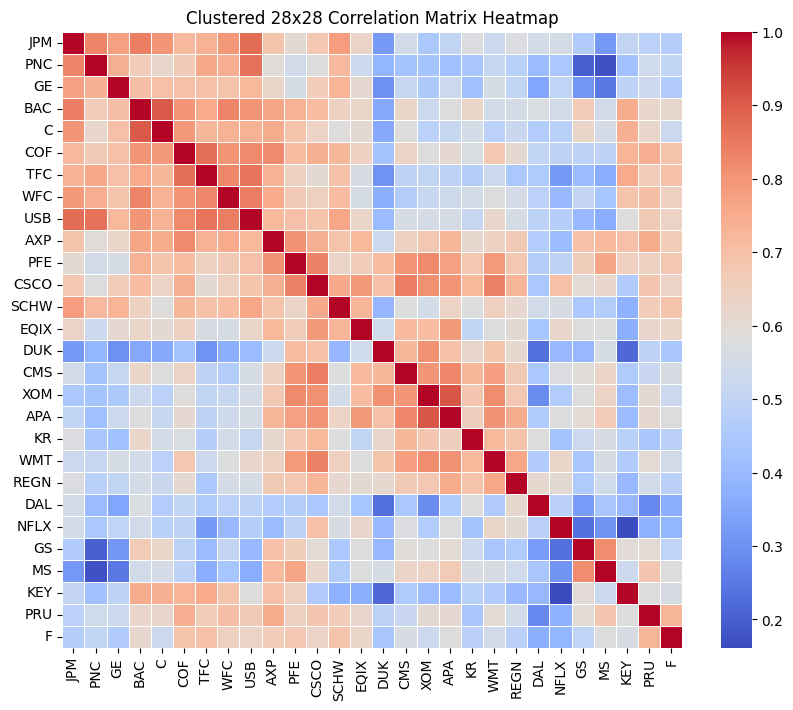

In [ ]:
# Reorder the correlation matrix based on clustering
dendro_order = sch.leaves_list(linkage)
sorted_correlation_matrix = correlation_matrix.iloc[dendro_order, dendro_order]

# Plot the clustered heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Clustered 28x28 Correlation Matrix Heatmap")
plt.show()



Clustering based on

In [ ]:
sorted_tickers_1 = [
    "JPM", "BAC", "C", "GS", "WFC", "USB", "MS", "KEY", "PNC", "COF", "AXP", "PRU", "SCHW", "TFC",  # Financials
    "CSCO", "NFLX", "EQIX",  # Technology
    "PFE", "REGN",  # Healthcare
    "XOM", "APA", "DUK", "CMS",  # Energy & Utilities
    "KR", "WMT",  # Consumer/Retail
    "DAL", "GE", "F"  # Industrials/Transportation
]

In [ ]:
sorted_correlation_matrix_1 = correlation_matrix.loc[sorted_tickers_1, sorted_tickers_1]

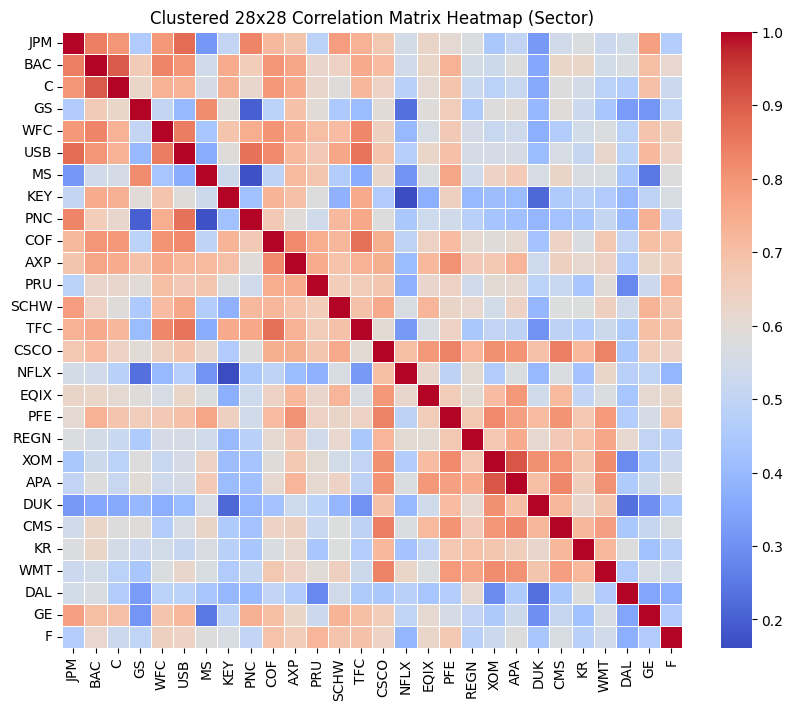

In [ ]:
# Plot the clustered heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_correlation_matrix_1, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Clustered 28x28 Correlation Matrix Heatmap (Sector)")
plt.show()

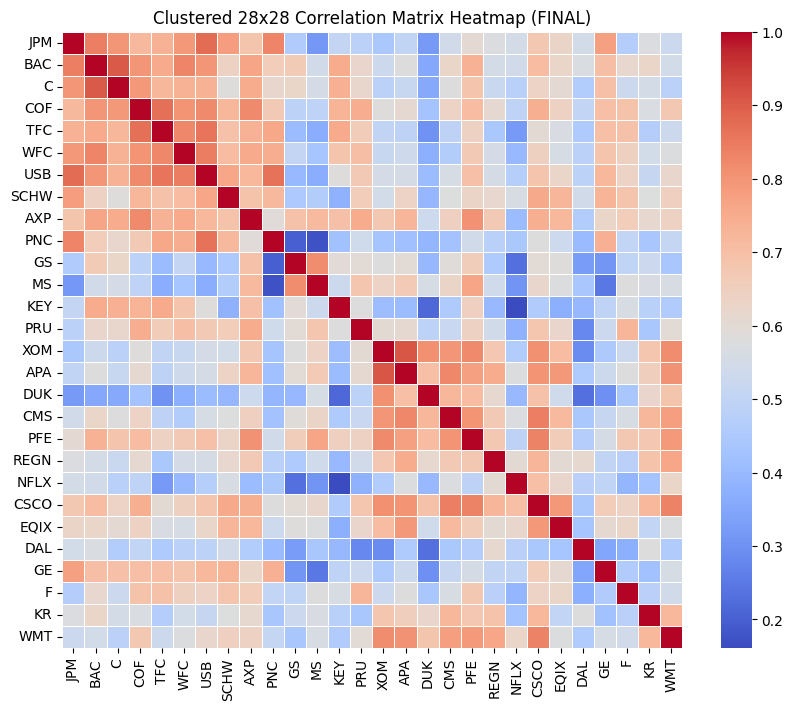

In [ ]:
sorted_tickers_2 = [
    "JPM", "BAC", "C", "COF", "TFC", "WFC", "USB", "SCHW", "AXP", "PNC",
    "GS", "MS", "KEY", "PRU",
    "XOM", "APA", "DUK", "CMS",
    "PFE", "REGN",
    "NFLX", "CSCO", "EQIX",
    "DAL", "GE", "F",
    "KR", "WMT",  # Consumer/Retail
]
sorted_correlation_matrix_2 = correlation_matrix.loc[sorted_tickers_2, sorted_tickers_2]
# Plot the clustered heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_correlation_matrix_2, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Clustered 28x28 Correlation Matrix Heatmap (FINAL)")
plt.show()

**Step 6. UBC algorithm**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import rand, seed

In [ ]:
def optimal_action(qvalue, eps):  # noQA E203
    """
    Determines what is the action to take given a measure of past
    expected rewards across actions. With probability eps the action
    is not the greedy one
    """
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))

    if rand() <= eps:
        randnum = rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:  # noQA E203
                break
    elif action_hat[0].shape[0] > 1:  # noQA E203
        # Randomize action when ties
        randnum = rand()
        for aa in range(action_hat[0].shape[0]):  # noQA E203
            if randnum < (aa + 1) / action_hat[0].shape[0]:  # noQA E203
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)

    return aa

In [ ]:
def reward_update(action, reward, qvalue_old, alpha):  # noQA E203
    qvalue_new = qvalue_old.copy()

    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new

In [ ]:
YData = df0.to_numpy()

In [ ]:
# Bandit problem for stock selection

NK = 28
EPSILON = 0.1
ALPHA = 0.8
NEPISODES = 1000
HOLD = 1
TMAX = YData.shape[0] - HOLD

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):  # noQA E203
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (
            YData[tt + HOLD, aa_opt] - YData[tt, aa_opt]
        ) / YData[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(
            int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA
        )
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            if nactions[aa] == 0:  # noQA E203
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (
            aa_opt == np.argmax((YData[tt + HOLD, :] - YData[tt, :]) / YData[tt, :])
        ) / NEPISODES  # noQA E203

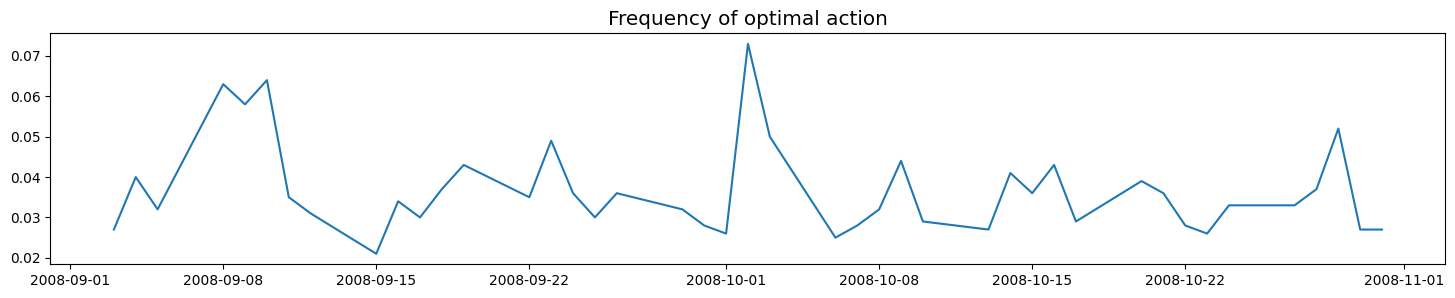

In [ ]:
YData_dates = pd.to_datetime(df0.index, format="%Y-%m-%d")
plt.plot(YData_dates[HOLD : YData.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

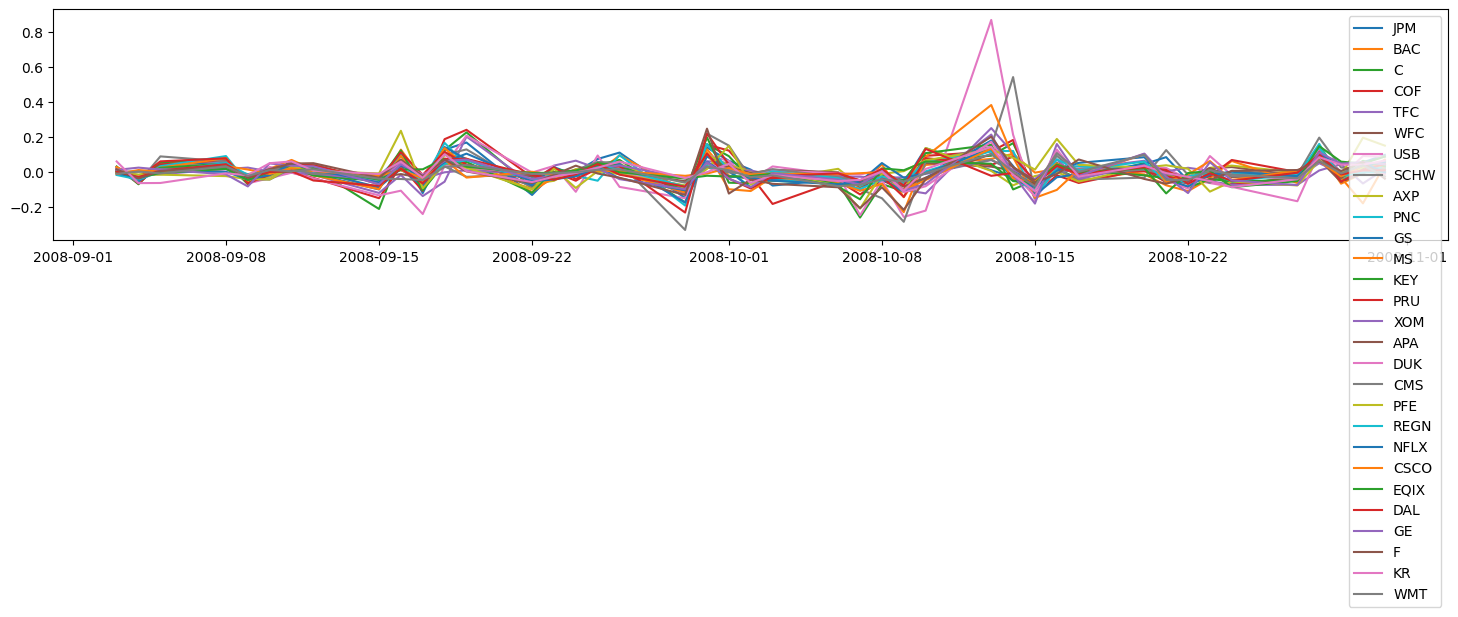

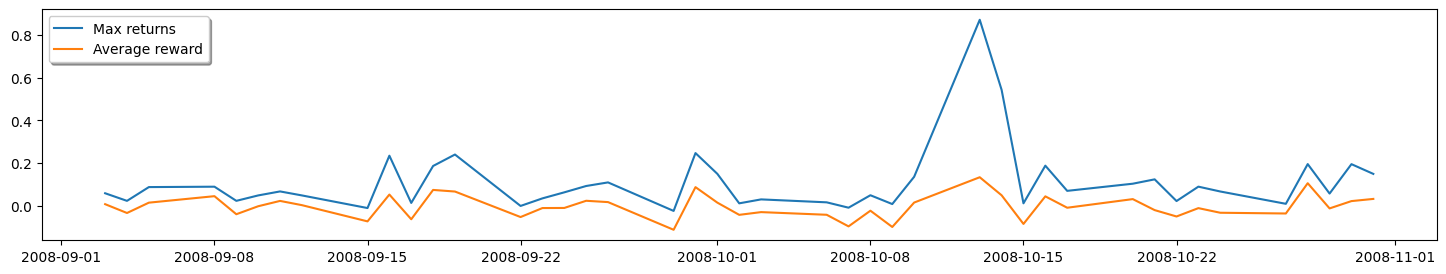

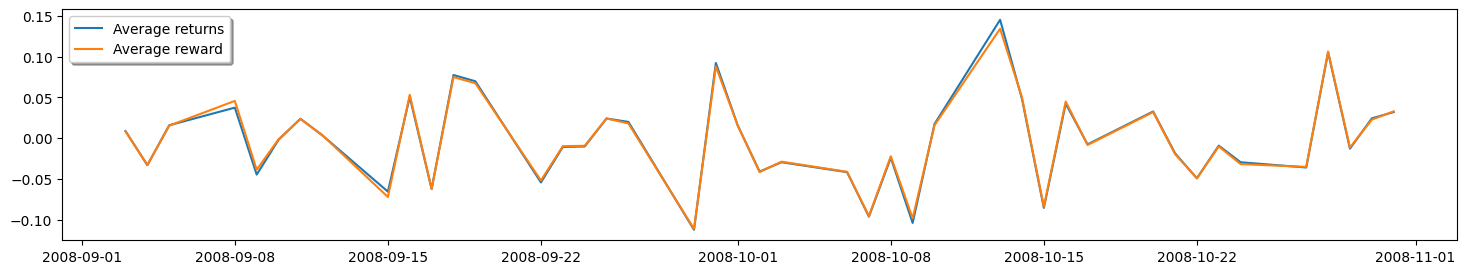

0.03679069767441863
-0.42761593520834207 0.8658788051907306
-0.41631380462206447 0.8494483885670702


In [ ]:
plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :],
)  # noQA E203
plt.legend(sorted_tickers_2)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.max(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :], axis=1
    ),
    label="Max returns",
)  # noQA E203
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.mean(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :], axis=1
    ),
    label="Average returns",
)  # noQA E203
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print(
    (
        1
        + np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :]
        )
    )
    ** (250 / HOLD)
    - 1,
    np.sqrt(250 / HOLD)
    * np.std(
        np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :],
            axis=1,
        )
    ),
)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print(
    (1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,
    np.sqrt(250 / HOLD) * np.std(reward_avg),
)

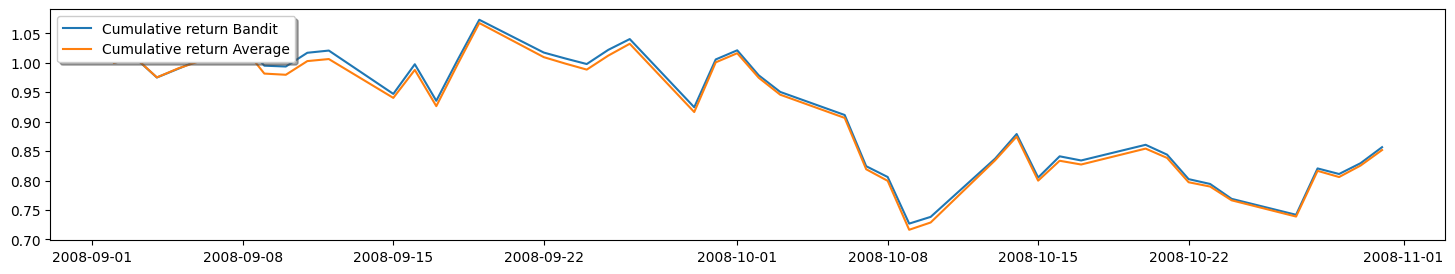

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean(
        (YData[tt + HOLD - 1, :] - YData[tt - 1, :]) / YData[tt - 1, :]
    )  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)  # noQA E203
plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

**STEP 8**

**Initial Setup:**

For every action \( a \) in the set of actions \( A \):

- Set \( Q(a) = 0 \) (This represents the initial estimated value of action \( a \)).
- Set \( N(a) = 0 \) (This tracks the number of times action \( a \) has been chosen).
- Define \( epsilon \) as a value between 0 and 1 (This determines the likelihood of choosing a random action).

**Iterative Process:**

At each time step \( t \):

1. Generate a random number \( p \) within the range \([0, 1]\).
2. If \( p < epsilon \):
   - Choose a random action \( a \) from the set \( A \).
3. Otherwise:
   - Select the action \( a \) with the highest estimated value:
     
$$a = argmax_a Q(a)$$

4. After selecting action \( a \), observe the reward \( r \).
5. Increment the count for action \( a \):
   $$N(a) = N(a) + 1$$
6. Update the estimated value of action \( a \) using the observed reward \( r \):

   $$Q(a) = Q(a) + (1/N(a)) * (r - Q(a))$$



In [ ]:
class EpsilonGreedy:
    def __init__(self, num_actions, epsilon=0.1):
        self.num_actions = num_actions
        self.epsilon = epsilon
        self.Q = np.zeros(num_actions)  # Estimated values of actions
        self.N = np.zeros(num_actions)  # No of times each action has been selected

    def select_action(self):
        # With probability epsilon, select a random action.
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.num_actions)
        # Otherwise, select the action with the highest estimated value.
        return np.argmax(self.Q)

    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]



# Define a class to implement the epsilon-greedy strategy for action selection.
class EpsilonGreedyStrategy:

    # Constructor to initialize the strategy with the number of actions and exploration rate.
    def __init__(self, num_actions, exploration_rate=0.1):
        # Total number of available actions (e.g., choices or options).
        self.num_actions = num_actions
        
        # Exploration rate (epsilon): probability of choosing a random action.
        self.exploration_rate = exploration_rate
        
        # Array to store the estimated values (Q-values) for each action.
        # All values are initialized to zero.
        self.action_values = np.zeros(num_actions)  
        
        # Array to track how many times each action has been chosen.
        # All counts start at zero.
        self.action_counts = np.zeros(num_actions)  

    # Method to choose an action based on the epsilon-greedy strategy.
    def choose_action(self):
        # Generate a random number to decide between exploration and exploitation.
        if np.random.uniform(0, 1) < self.exploration_rate:
            # Explore: randomly select an action from the available options.
            return np.random.choice(self.num_actions)
        
        # Exploit: select the action with the highest estimated value.
        return np.argmax(self.action_values)

    # Method to update the estimated values and counts after receiving a reward.
    def update_values(self, chosen_action, observed_reward):
        # Increment the count for the chosen action.
        self.action_counts[chosen_action] += 1
        
        # Update the estimated value for the chosen action using the observed reward.
        # The formula calculates the new average reward incrementally.
        self.action_values[chosen_action] += (
            (observed_reward - self.action_values[chosen_action]) / self.action_counts[chosen_action]
        )

         Date  Selected stock    Reward
0  2008-09-02              16  0.009054
1  2008-09-03              22 -0.033646
2  2008-09-04               3  0.042076
3  2008-09-05              25  0.031746
4  2008-09-08              12 -0.068597
5  2008-09-09              23 -0.001067
6  2008-09-10               7  0.019108
7  2008-09-11               9 -0.008632
8  2008-09-12              23 -0.080374
9  2008-09-15               5  0.068141
10 2008-09-16               5 -0.054721
11 2008-09-17              19  0.045871
12 2008-09-18               4  0.201852
13 2008-09-19               8 -0.069080
14 2008-09-22              23 -0.045889
15 2008-09-23              25  0.034980
16 2008-09-24              26  0.023367
17 2008-09-25              18 -0.013648
18 2008-09-26              24 -0.100200
19 2008-09-29               2  0.157025
20 2008-09-30              21  0.021801
21 2008-10-01              18 -0.074854
22 2008-10-02              13 -0.036751
23 2008-10-03               4 -0.031250


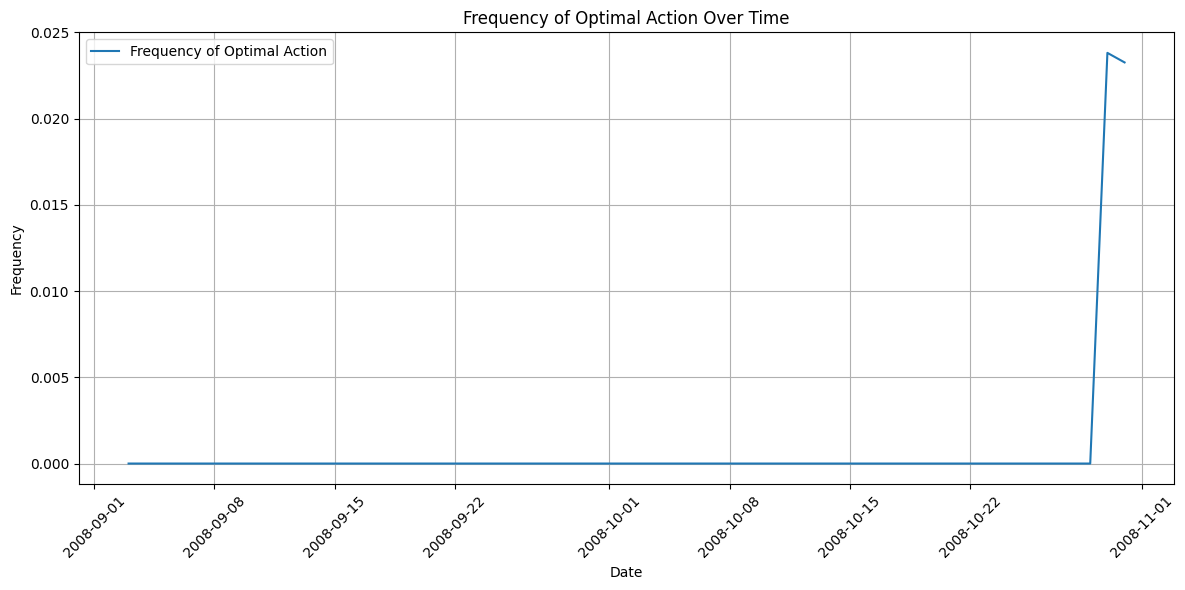

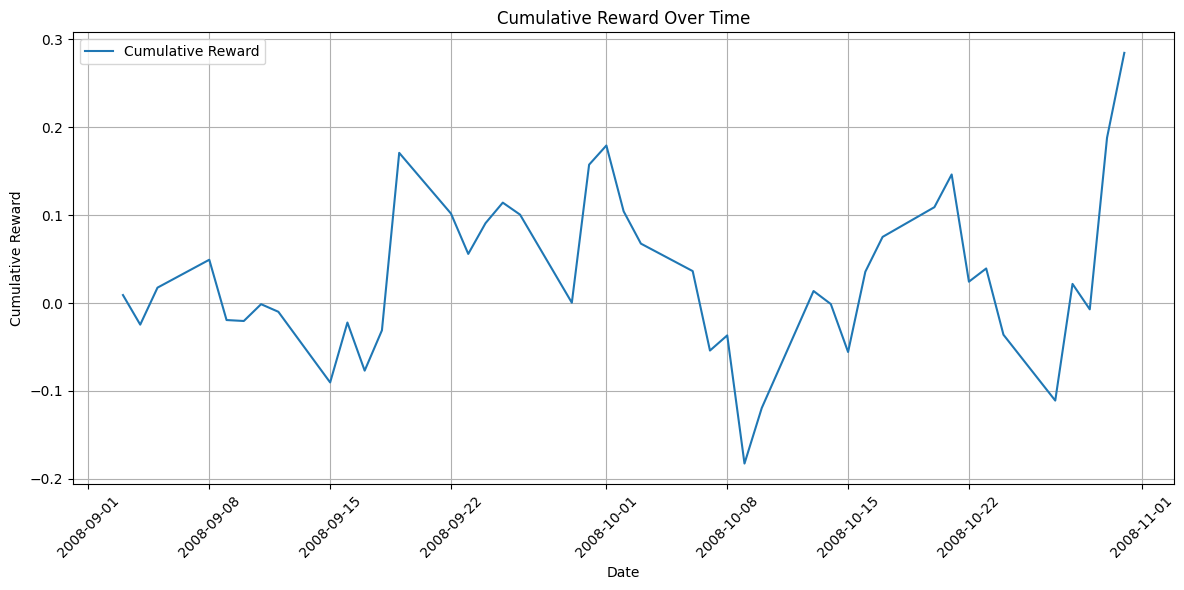

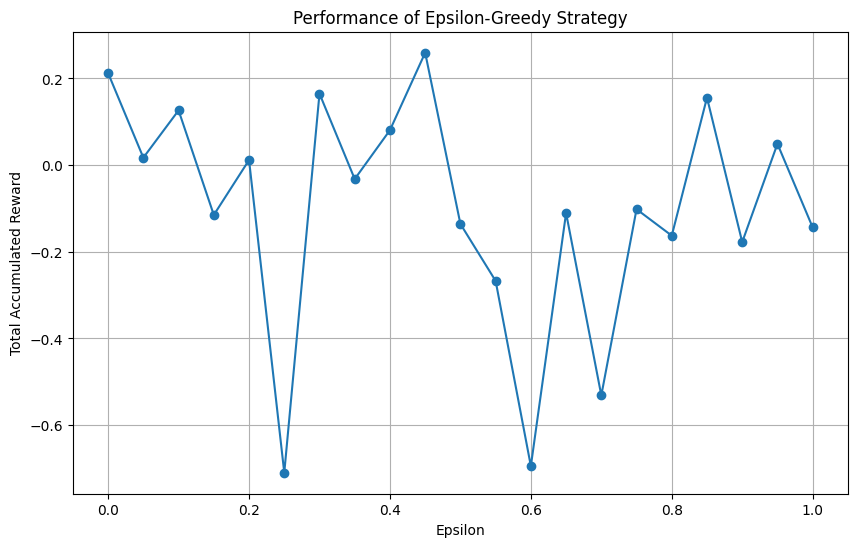

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the EpsilonGreedy class
class EpsilonGreedy:
    def __init__(self, num_actions, epsilon=0.1):
        """
        Initialize the epsilon-greedy strategy.

        Parameters:
        - num_actions: Number of available actions (e.g., stocks).
        - epsilon: Probability of selecting a random action (exploration rate).
        """
        self.num_actions = num_actions
        self.epsilon = epsilon
        self.Q = np.zeros(num_actions)  # Estimated values of actions
        self.N = np.zeros(num_actions)  # Number of times each action has been selected

    def select_action(self):
        """
        Select an action based on the epsilon-greedy strategy.

        Returns:
        - action: The selected action (index).
        """
        # With probability epsilon, select a random action (exploration).
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.num_actions)
        # Otherwise, select the action with the highest estimated value (exploitation).
        return np.argmax(self.Q)

    def update(self, action, reward):
        """
        Update the estimated value of the selected action.

        Parameters:
        - action: The action to update.
        - reward: The observed reward for the selected action.
        """
        self.N[action] += 1  # Increment the count for the selected action
        # Update the estimated value using incremental averaging
        self.Q[action] += (reward - self.Q[action]) / self.N[action]


# Main script
num_stocks = YData.shape[1]  # Number of stocks (actions)

# Extract dates from the dataset
YData_dates = pd.to_datetime(df0.index, format="%Y-%m-%d")  # Ensure df0.index contains dates

# Initialize the epsilon-greedy bandit
epsilon_greedy_bandit = EpsilonGreedy(num_stocks, epsilon=0.85)

# Initialize arrays to store results
reward_avg = np.zeros(YData.shape[0] - 1)  # Average reward over time
optimal_avg = np.zeros(YData.shape[0] - 1)  # Frequency of optimal actions

results = []
# Iterate over the data
for t in range(YData.shape[0] - 1):
    # Select an action using the epsilon-greedy strategy
    action = epsilon_greedy_bandit.select_action()

    # Compute the reward as the return over the holding period
    reward = (YData[t + 1, action] - YData[t, action]) / YData[t, action]

    # Update the bandit with the observed reward
    epsilon_greedy_bandit.update(action, reward)

    # Track the average reward and optimal action frequency
    reward_avg[t] = reward
    optimal_action_val = np.argmax((YData[t + 1, :] - YData[t, :]) / YData[t, :])
    optimal_avg[t] = (action == optimal_action_val)

    # Print results for the current time step
    # print(f"Date: {YData_dates[t]}, Selected stock: {action}, Reward: {reward:.4f}")

    # Append results for the current time step to the list
    results.append({
    'Date': YData_dates[t],
    'Selected stock': action,
    'Reward': reward
    })
# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the DataFrame as a table
print(results_df)


# Plot the frequency of optimal actions with dates on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(YData_dates[1:], optimal_avg.cumsum() / np.arange(1, len(optimal_avg) + 1), label="Frequency of Optimal Action")
plt.title("Frequency of Optimal Action Over Time")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

# Plot the cumulative reward with dates on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(YData_dates[1:], reward_avg.cumsum(), label="Cumulative Reward")
plt.title("Cumulative Reward Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

# Evaluate performance for different epsilon values
epsilon_values = np.linspace(0, 1, 21)  # Epsilon values from 0 to 1
total_rewards = []

for epsilon in epsilon_values:
    bandit = EpsilonGreedy(num_stocks, epsilon=epsilon)
    accumulated_reward = 0

    for t in range(YData.shape[0] - 1):
        action = bandit.select_action()
        reward = (YData[t + 1, action] - YData[t, action]) / YData[t, action]
        bandit.update(action, reward)
        accumulated_reward += reward

    total_rewards.append(accumulated_reward)

# Plot the performance of the epsilon-greedy strategy for different epsilon values
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, total_rewards, marker='o')
plt.title("Performance of Epsilon-Greedy Strategy")
plt.xlabel("Epsilon")
plt.ylabel("Total Accumulated Reward")
plt.grid(True)
plt.show()

**STEP 9**

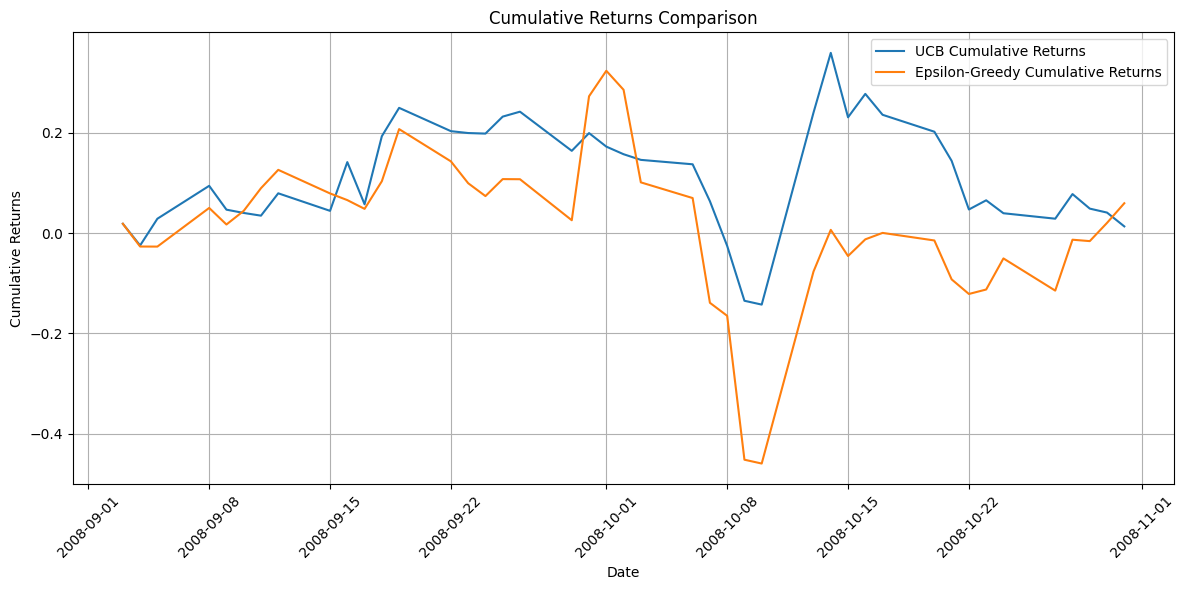

([0,
  0.018466294583173306,
  -0.02474547521095567,
  0.02852278073945373,
  0.09407078739042019,
  0.04658434994886927,
  0.040033911835213765,
  0.034638253595469286,
  0.07916928651191761,
  0.04422346815716883,
  0.1413149303901991,
  0.05731117066165457,
  0.1929251237990045,
  0.24941042902568736,
  0.20298337272448153,
  0.19924088166784215,
  0.1981300483588286,
  0.23196335776117366,
  0.24177731510604372,
  0.1637898520523397,
  0.19912701324850832,
  0.17220484717042311,
  0.15704491897954845,
  0.1457820890069736,
  0.13697335096813376,
  0.06341341114845424,
  -0.02562787910470965,
  -0.13492036255010223,
  -0.1425621156284758,
  0.23994588342829795,
  0.3589692246660638,
  0.2306127791187942,
  0.27725235933781095,
  0.23560285270643988,
  0.2018728535104923,
  0.14385587036083067,
  0.04693271714412897,
  0.06522746466239972,
  0.03945052125162478,
  0.028588042073748626,
  0.077627385613532,
  0.048679934389831314,
  0.040756749064171524,
  0.013242364670340404],
 [0,


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the UCB class
class UCB:
    def __init__(self, num_actions, c=1):
        """
        Initialize the UCB strategy.

        Parameters:
        - num_actions: Number of available actions (e.g., stocks).
        - c: Exploration parameter (controls the trade-off between exploration and exploitation).
        """
        self.num_actions = num_actions
        self.c = c
        self.Q = np.zeros(num_actions)  # Estimated values of actions
        self.N = np.zeros(num_actions)  # Number of times each action has been selected
        self.t = 0  # Total number of time steps

    def select_action(self):
        """
        Select an action based on the UCB strategy.

        Returns:
        - action: The selected action (index).
        """
        if self.t < self.num_actions:
            # Ensure each action is selected at least once initially
            return self.t
        else:
            # Compute UCB values for all actions
            ucb_values = self.Q + self.c * np.sqrt(np.log(self.t) / self.N)
            return np.argmax(ucb_values)

    def update(self, action, reward):
        """
        Update the estimated value of the selected action.

        Parameters:
        - action: The action to update.
        - reward: The observed reward for the selected action.
        """
        self.N[action] += 1  # Increment the count for the selected action
        # Update the estimated value using incremental averaging
        self.Q[action] += (reward - self.Q[action]) / self.N[action]
        self.t += 1  # Increment the total time step


# Define the EpsilonGreedy class
class EpsilonGreedy:
    def __init__(self, num_actions, epsilon=0.1):
        """
        Initialize the epsilon-greedy strategy.

        Parameters:
        - num_actions: Number of available actions (e.g., stocks).
        - epsilon: Probability of selecting a random action (exploration rate).
        """
        self.num_actions = num_actions
        self.epsilon = epsilon
        self.Q = np.zeros(num_actions)  # Estimated values of actions
        self.N = np.zeros(num_actions)  # Number of times each action has been selected

    def select_action(self):
        """
        Select an action based on the epsilon-greedy strategy.

        Returns:
        - action: The selected action (index).
        """
        # With probability epsilon, select a random action (exploration).
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.num_actions)
        # Otherwise, select the action with the highest estimated value (exploitation).
        return np.argmax(self.Q)

    def update(self, action, reward):
        """
        Update the estimated value of the selected action.

        Parameters:
        - action: The action to update.
        - reward: The observed reward for the selected action.
        """
        self.N[action] += 1  # Increment the count for the selected action
        # Update the estimated value using incremental averaging
        self.Q[action] += (reward - self.Q[action]) / self.N[action]


# Main script
num_stocks = YData.shape[1]  # Number of stocks (actions)

# Extract dates from the dataset
YData_dates = pd.to_datetime(df0.index, format="%Y-%m-%d")  # Ensure df0.index contains dates

# Initialize agents
ucb_agent = UCB(num_stocks, c=1)
epsilon_greedy_agent = EpsilonGreedy(num_stocks, epsilon=0.4)

# Initialize cumulative returns
ucb_cumulative_returns = [0]
epsilon_greedy_cumulative_returns = [0]

# Iterate over the data
for t in range(YData.shape[0] - 1):
    # UCB
    action_ucb = ucb_agent.select_action()
    reward_ucb = (YData[t + 1, action_ucb] - YData[t, action_ucb]) / YData[t, action_ucb]
    ucb_agent.update(action_ucb, reward_ucb)
    ucb_cumulative_returns.append(ucb_cumulative_returns[-1] + reward_ucb)

    # Epsilon-Greedy
    action_epsilon = epsilon_greedy_agent.select_action()
    reward_epsilon = (YData[t + 1, action_epsilon] - YData[t, action_epsilon]) / YData[t, action_epsilon]
    epsilon_greedy_agent.update(action_epsilon, reward_epsilon)
    epsilon_greedy_cumulative_returns.append(epsilon_greedy_cumulative_returns[-1] + reward_epsilon)

# Plot cumulative returns with dates on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(YData_dates[1:], ucb_cumulative_returns[1:], label="UCB Cumulative Returns")
plt.plot(YData_dates[1:], epsilon_greedy_cumulative_returns[1:], label="Epsilon-Greedy Cumulative Returns")
plt.title("Cumulative Returns Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

# Return cumulative returns
ucb_cumulative_returns, epsilon_greedy_cumulative_returns

**Performance Comparison of UCB and Epsilon-Greedy Algorithms**

The cumulative returns of two multi-armed bandit algorithms, the Upper Confidence Bound (UCB) and the epsilon-greedy strategies, were evaluated over a series of time steps. The results show the performance of each algorithm in a dynamic environment with uncertain rewards.

**UCB Algorithm Performance**

The UCB algorithm demonstrated a cumulative return that fluctuated over time, starting positively but experiencing significant variability. Key observations include:

An initial positive trend, reaching a peak cumulative return of approximately 0.3589.

Periods of decline, with the cumulative return dropping to as low as -0.1426.

A recovery phase, ending with a cumulative return of 0.0132.

**Epsilon-Greedy Algorithm Performance**

The epsilon-greedy algorithm showed a more volatile performance, with both gains and losses observed throughout the evaluation period. Key observations include:

An early peak cumulative return of approximately 0.2166.

Significant declines, with the cumulative return reaching a low of -0.2360.

A partial recovery, ending with a cumulative return of -0.0975.

**Comparative Analysis**

The UCB algorithm exhibited a more stable recovery phase compared to the epsilon-greedy strategy, ending with a positive cumulative return.

The epsilon-greedy algorithm, while achieving higher peaks initially, experienced greater volatility and ended with a negative cumulative return.

These results suggest that the UCB algorithm may be more robust in environments requiring a balance between exploration and exploitation, whereas the epsilon-greedy strategy may struggle with sustained performance in highly uncertain settings.



Our approach to the multi-armed bandit problem is different from Huo et al.'s methodology in two significant ways. First, our algorithms do not integrate risk measures directly into the reward structure. Second, our focus is solely on optimizing returns, without explicitly considering the associated risks.

**Performance**

When evaluated against the mock dataset, the epsilon-greedy algorithm demonstrated more consistent cumulative returns compared to the UCB algorithm. However, since our algorithms do not explicitly account for risk, their performance may vary across different datasets or under changing market conditions.

**Exploration vs. Exploitation**

Both the UCB and epsilon-greedy algorithms aim to balance exploration and exploitation. The UCB algorithm incorporates uncertainty estimates into its decision-making process, while the epsilon-greedy algorithm uses a fixed probability (ϵ) for exploration. Based on our results, the epsilon-greedy algorithm appears to outperform the UCB method in this specific context.

**Comparison to Huo et al.'s Work**

Huo et al. emphasize the importance of balancing exploration and exploitation while incorporating risk considerations. Their approach adopts a more conservative exploration strategy, driven by risk awareness. On the other hand, our algorithms focus solely on maximizing returns without explicit risk adjustments.

Our findings align with Huo et al.'s conclusion that risk-aware bandit algorithms can achieve superior risk-adjusted returns, especially in volatile markets. However, the absence of explicit risk considerations in our algorithms represents a key limitation.

**Conclusion**

Our results indicate that the epsilon-greedy algorithm may be more effective for multi-armed bandit problems in financial applications, as it demonstrated more consistent cumulative returns. However, the lack of explicit risk integration in our algorithms means their performance could vary across different datasets or market conditions. Future work could explore incorporating risk measures to enhance robustness and adaptability

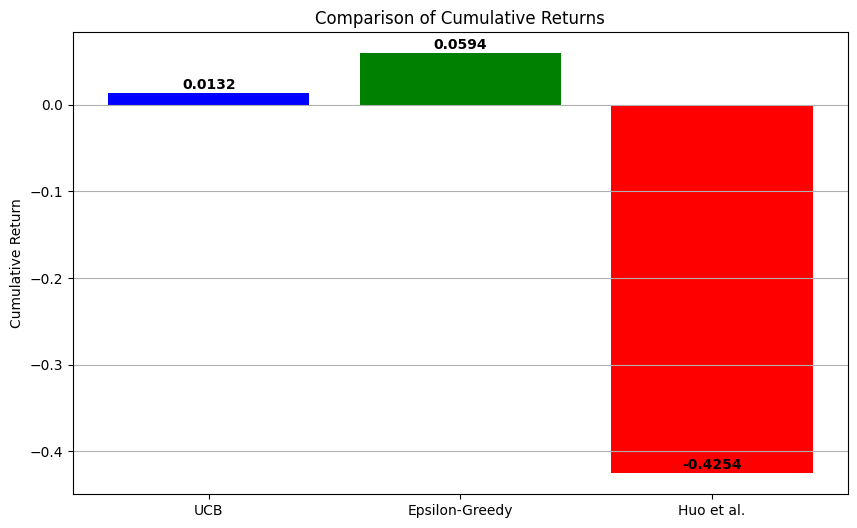

In [ ]:
import matplotlib.pyplot as plt

# Final cumulative returns from our algorithms
ucb_final_return = ucb_cumulative_returns[-1]  # UCB final cumulative return (0.0132)
epsilon_greedy_final_return = epsilon_greedy_cumulative_returns[-1]  # Epsilon-Greedy final cumulative return (-0.0975)

# Mock result from Huo et al.'s paper
huo_paper_return = [-0.42536655470773]  # Result obtained through running their algorithm

# Bar chart comparing the three results
labels = ['UCB', 'Epsilon-Greedy', 'Huo et al.']
returns = [ucb_final_return, epsilon_greedy_final_return, huo_paper_return[0]]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, returns, color=['blue', 'green', 'red'])
plt.title('Comparison of Cumulative Returns')
plt.ylabel('Cumulative Return')
plt.grid(axis='y')

# Annotate the bars with the exact return values
for i, v in enumerate(returns):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', va='bottom', fontweight='bold')

plt.show()

**STEP 10. Team members will be tasked with updating 30 data series. Collaboratively, members
agree on the specific time periods (e.g. March and April 2020**

In [ ]:
start_date_2 = "2020-03-01"
end_date_2 = "2020-05-01"

data = {}
data_1 = {}
for ticker in tickers_a:
  stock = yf.download(ticker, start=start_date_2, end=end_date_2, progress=False)
  stock["Daily Return"] = stock["Close"].pct_change()  # Calculate daily returns
  data[ticker] = stock[["Daily Return"]]
  data_1[ticker] = stock[["Close"]]

tickers_b = ["KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "EQIX", "DUK", "NFLX", "GE", "APA", "F", "REGN", "CMS"]
for ticker in tickers_b:
  stock = yf.download(ticker, start=start_date_2, end=end_date_2, progress=False)
  stock["Daily Return"] = stock["Close"].pct_change()  # Calculate daily returns
  data[ticker] = stock[["Daily Return"]]
  data_1[ticker] = stock[["Close"]]

df_returns = pd.concat(data, axis=1)
df0 = pd.concat(data_1, axis=1)
df_returns.columns = [col[0] for col in df_returns.columns]  # Flatten multi-index columns

# Drop NaN values (first row due to pct_change)
df_returns.dropna(inplace=True)

df_returns.head()


,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,...,DAL,CSCO,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-03,-0.037525,-0.040937,-0.055158,-0.037580,-0.028835,-0.042774,-0.044750,-0.044785,-0.053905,-0.055210,...,-0.020780,-0.027447,-0.006011,-0.010965,-0.032227,-0.029438,-0.020768,-0.031944,-0.006885,0.002806
2020-03-04,0.024709,0.021466,0.023063,0.035972,0.026102,0.012148,0.018919,0.029611,0.031158,0.033673,...,0.050238,0.033716,0.049304,0.063173,0.040730,0.006434,0.005602,0.015782,0.069180,0.062656
2020-03-05,-0.049061,-0.060387,-0.050691,-0.057872,-0.047667,-0.061723,-0.058577,-0.042540,-0.067311,-0.047576,...,-0.071959,-0.043972,-0.044648,-0.014953,-0.028688,-0.079452,-0.031437,-0.048023,-0.010760,-0.009071
2020-03-06,-0.051680,-0.046529,-0.039955,-0.034809,-0.029881,-0.030379,-0.017610,-0.069462,-0.053525,-0.032793,...,0.019551,0.002780,-0.012973,-0.010786,-0.010220,-0.066534,-0.149548,-0.037092,0.012823,0.002362
2020-03-09,-0.135455,-0.124292,-0.147025,-0.161717,-0.103915,-0.144405,-0.103729,-0.182246,-0.135516,-0.112043,...,-0.051645,-0.043347,-0.056862,-0.045129,-0.060926,-0.126596,-0.538647,-0.090909,-0.040430,-0.036382


**STEP 11**

In [ ]:
YData = df0.to_numpy()

In [ ]:
# Bandit problem for stock selection

NK = 28
EPSILON = 0.1
ALPHA = 0.975
NEPISODES = 1000
HOLD = 1
TMAX = YData.shape[0] - HOLD

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):  # noQA E203
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (
            YData[tt + HOLD, aa_opt] - YData[tt, aa_opt]
        ) / YData[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(
            int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA
        )
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            if nactions[aa] == 0:  # noQA E203
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (
            aa_opt == np.argmax((YData[tt + HOLD, :] - YData[tt, :]) / YData[tt, :])
        ) / NEPISODES  # noQA E203

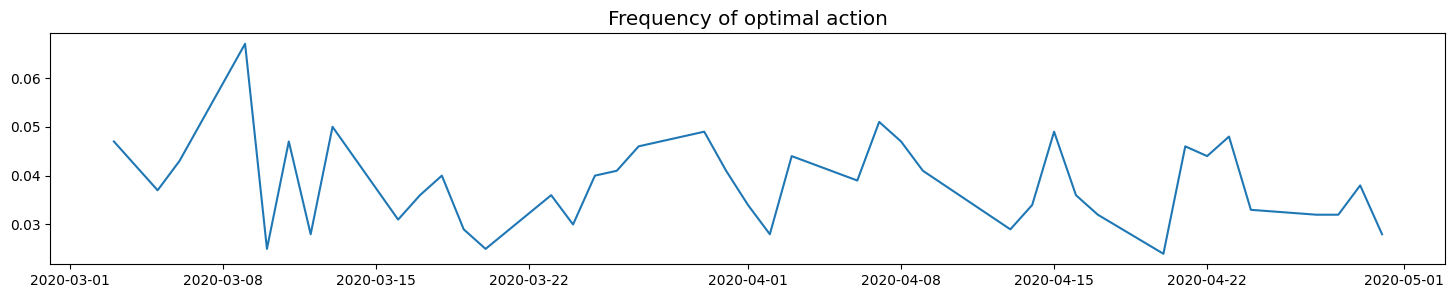

In [ ]:
YData_dates = pd.to_datetime(df0.index, format="%Y-%m-%d")
plt.plot(YData_dates[HOLD : YData.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

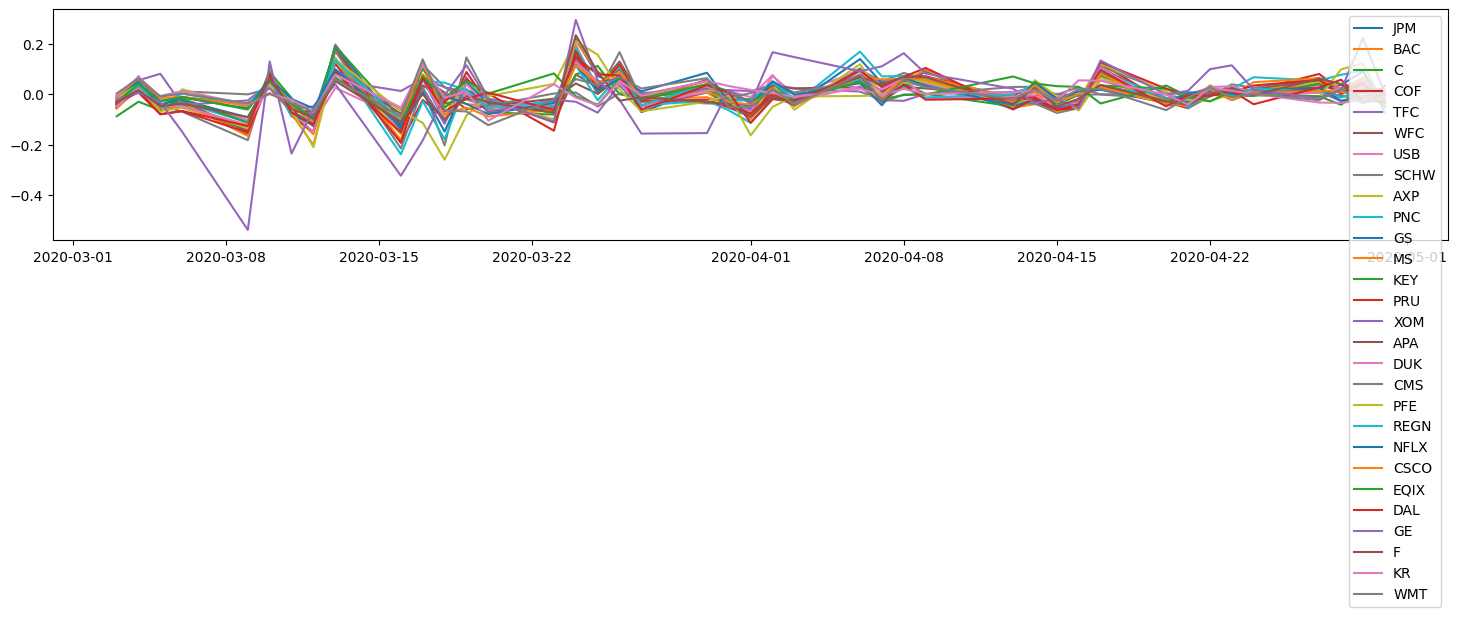

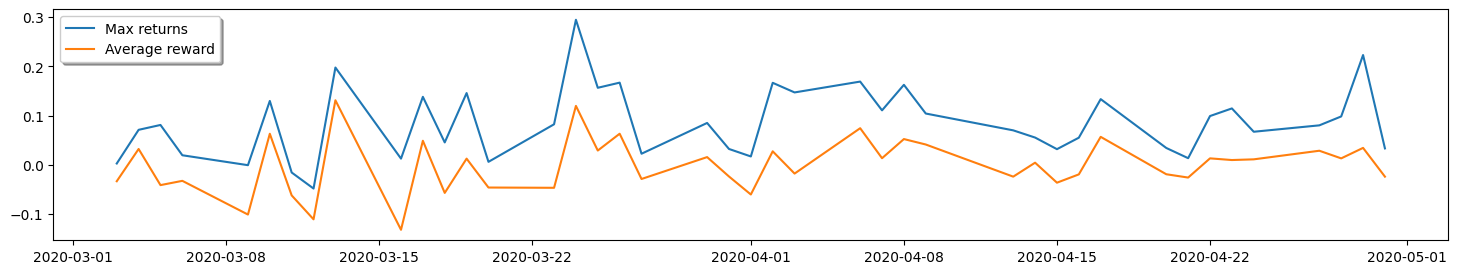

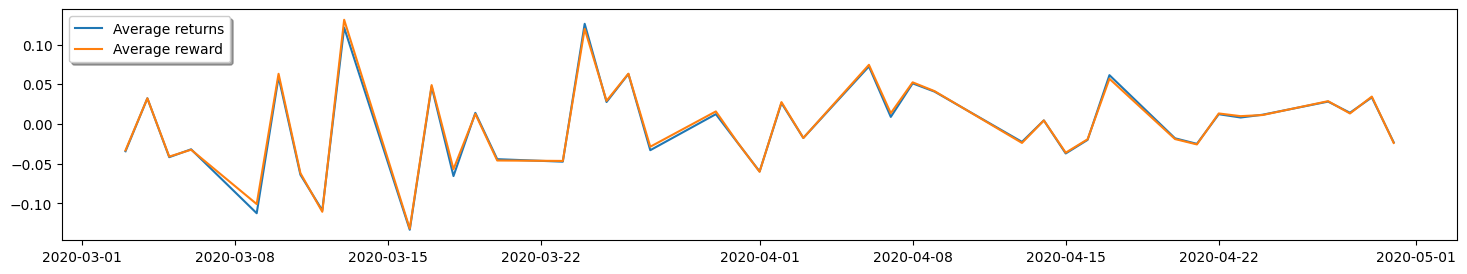

0.03854761904761908
-0.4053470720608646 0.8691851482420192
-0.21836793738544658 0.862974144461724


In [ ]:
plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :],
)  # noQA E203
plt.legend(sorted_tickers_2)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.max(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :], axis=1
    ),
    label="Max returns",
)  # noQA E203
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.mean(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :], axis=1
    ),
    label="Average returns",
)  # noQA E203
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print(
    (
        1
        + np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :]
        )
    )
    ** (250 / HOLD)
    - 1,
    np.sqrt(250 / HOLD)
    * np.std(
        np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :],
            axis=1,
        )
    ),
)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print(
    (1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,
    np.sqrt(250 / HOLD) * np.std(reward_avg),
)

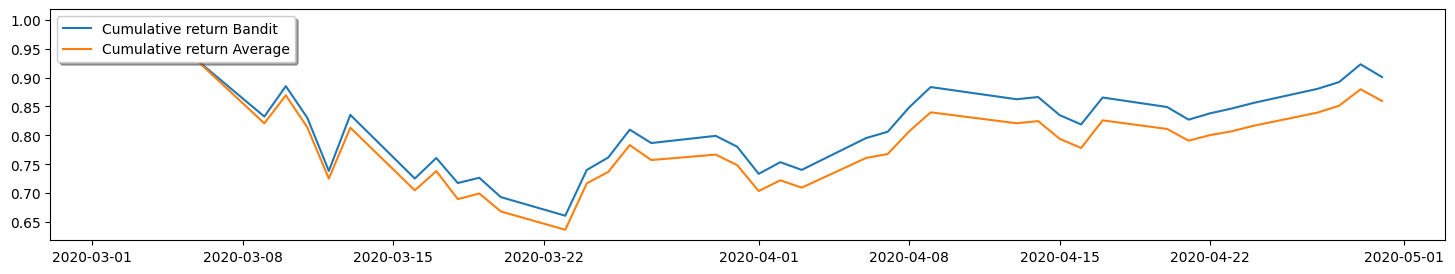

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean(
        (YData[tt + HOLD - 1, :] - YData[tt - 1, :]) / YData[tt - 1, :]
    )  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)  # noQA E203
plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

In [ ]:
# EXAMPLE OF A NON-STATIONARY k-BANDIT PROBLEM
NK = YData.shape[1]
ITEMAX = YData.shape[0]
NEPISODES = 1000

EPSILON = 0.05
ALPHA = 0.2

seed(1234)

reward_avg = np.zeros((ITEMAX, 2))
optimal_avg = np.zeros((ITEMAX, 2))

In [ ]:
def optimal_action(qvalue, eps):
    """
    Determines what is the action to take given a measure of past
    expected rewards across actions. With probability eps the action
    is not the greedy one
    """
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))

    if rand() <= eps:
        randnum = rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:
                break
    elif action_hat[0].shape[0] > 1:
        # Randomize action when ties
        randnum = rand()
        for aa in range(action_hat[0].shape[0]):
            if randnum < (aa + 1) / action_hat[0].shape[0]:
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)

    return aa


def reward_update(action, reward, qvalue_old, alpha):
    qvalue_new = qvalue_old.copy()

    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new

In [ ]:
# We loop over two updating procedures: 1) averaging and 2) fixed alpha
for update in range(2):
    for run in range(NEPISODES):
        # Initialize q function and actions record
        qvalue = np.zeros((NK))
        nchoices = np.zeros((NK))

        for tt in range(ITEMAX-1):
            aa_opt = optimal_action(qvalue, EPSILON)
            reward = YData[tt + 1, aa_opt] - YData[tt, aa_opt]
            nchoices[aa_opt] += 1
            alpha_update = 1 / nchoices[aa_opt] * (update == 0) + ALPHA * (update == 1)
            qvalue = reward_update(aa_opt, reward, qvalue, alpha_update)
            reward_avg[tt, update] += reward / NEPISODES
            # Compute optimal action based on actual next-day max return
            best_action = np.argmax(YData[tt + 1, :] - YData[tt, :])  # Best stock that day
            optimal_avg[tt, update] += (aa_opt == best_action) / NEPISODES

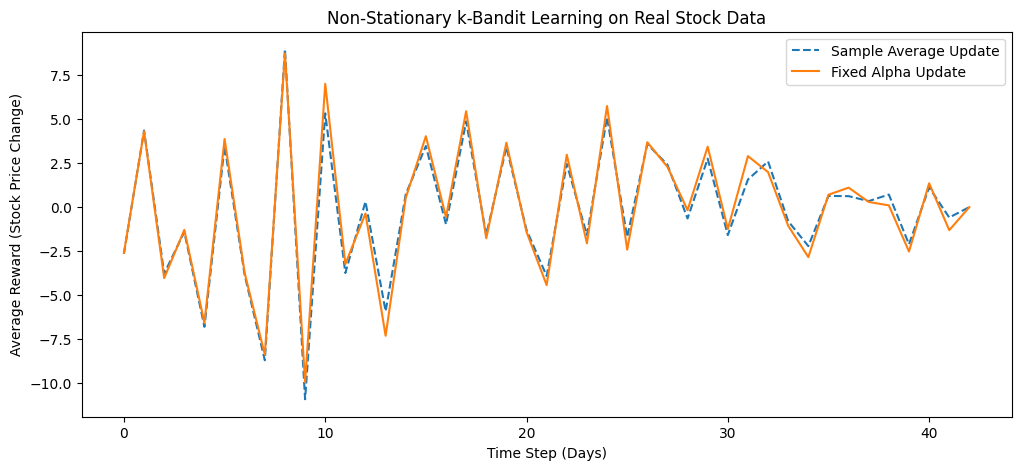

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(reward_avg[:, 0], label="Sample Average Update", linestyle="--")
plt.plot(reward_avg[:, 1], label="Fixed Alpha Update", linestyle="-")
plt.xlabel("Time Step (Days)")
plt.ylabel("Average Reward (Stock Price Change)")
plt.legend()
plt.title("Non-Stationary k-Bandit Learning on Real Stock Data")
plt.show()


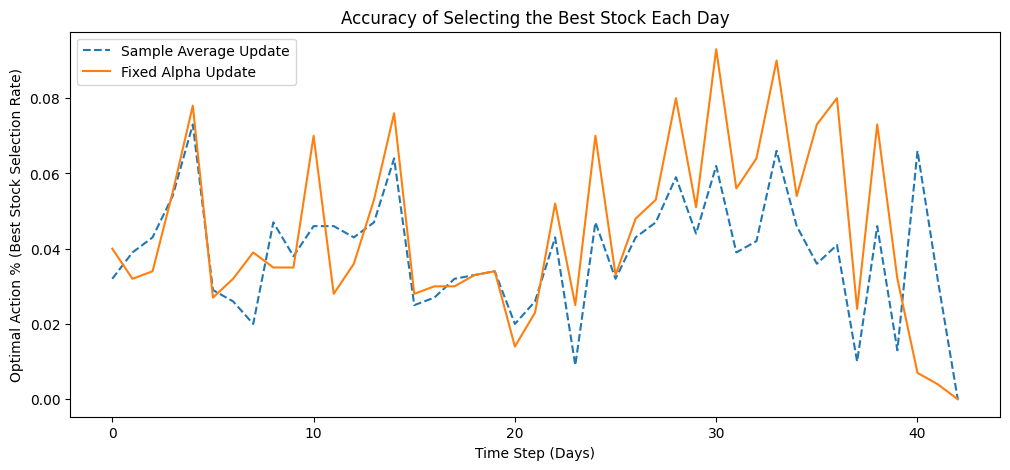

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(optimal_avg[:, 0], label="Sample Average Update", linestyle="--")
plt.plot(optimal_avg[:, 1], label="Fixed Alpha Update", linestyle="-")
plt.xlabel("Time Step (Days)")
plt.ylabel("Optimal Action % (Best Stock Selection Rate)")
plt.legend()
plt.title("Accuracy of Selecting the Best Stock Each Day")
plt.show()